In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import metrics

# DATASET

C:\Users\y\AppData\Local\Temp\ipykernel_5956\1524090102.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


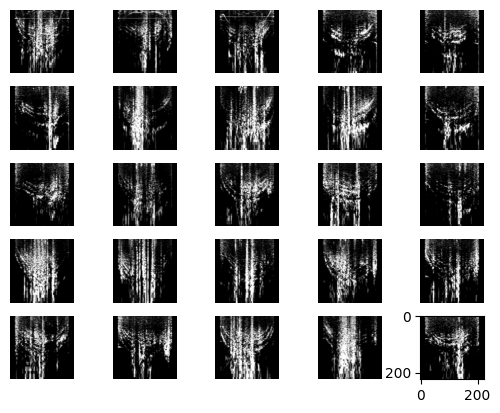

In [3]:
dspath = []

pathu = r"C:\y\code\ai\u"
pathnu = r"C:\y\code\ai\nu"

for img_path in os.listdir(pathu):
    dspath.append(pathu+'\\'+img_path)
for img_path in os.listdir(pathnu):
    dspath.append(pathnu+'\\'+img_path)

ds = [(cv.cvtColor(cv.imread(path),cv.COLOR_BGR2GRAY),path.split('\\')[-2]) for path in dspath]

size = len(ds[0][0])
mid = int(size/2)

plt.figure()
for i in range(25):
    plt.grid(False)
    plt.axis('off')
    plt.subplot(5,5,i+1)
    plt.imshow(ds[i][0], cmap='gray')
plt.show()

# ALGORITHM

In [4]:
def detect(img,threshold,floor,ceil):
    size = len(img)

    #Thresholding
    img = cv.threshold(img, threshold, 255, cv.THRESH_BINARY)[1]
    
    #Mask
    matches=[]
    for i in range(mid):
        mask = masker(mid-i,100,100,2)

        #Pixel Matching
        result = cv.bitwise_and(img,img,mask=mask)
        match = sum(sum(result))*100/sum(sum(mask))
        matches.append(match)

    #Result (uncomment to have a visual)
    # window = np.concatenate((img,mask,result), axis=1)
    # cv.imshow("window",window)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    return floor<max(matches)<ceil

def masker(cy,ax,ay,thickness):
    mask = np.zeros((size,size,3), np.uint8)
    cv.line(mask,(mid-ax,0),(mid-ax,cy),(255,255,255),thickness)
    cv.line(mask,(mid+ax,0),(mid+ax,cy),(255,255,255),thickness)
    cv.ellipse(mask,(int(size/2),cy),(ax,ay),0,0,180,(255,255,255),thickness)
    mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
    return mask

# MODEL

## Parameter

In [5]:
model = []
values = [ds[i][1]=='u' for i in range(len(ds))]
thresholds = range(63,190)
floors = range(25,75)
cys= range(mid-150,mid-50)
axs=ays=range(50,200)
thicknesss = range(1,5)
plt.show()

## Training

In [ ]:
for t in thresholds:
    for f in floors:
        params ={'threshold':t,'floor':f,'ceil':100}
        prediction = [detect(ds[i][0],**params) for i in range(len(ds))]
        model.append((params,metrics.accuracy_score(prediction,values)))

with open('hist.txt','w',encoding='utf-8') as hist:
    hist.write(model)

# EVALUATION

In [6]:
bests = [best[0] for best in model if max([m[1] for m in model])-0.01<best[1]<max([m[1] for m in model])]
for p in bests:
    print(p)
    res = [detect(ds[i][0],**p) for i in range(len(ds))]

# Uncomment to Evaluate with the best parameter found so far
# res = [detect(ds[i][0],100,58,100) for i in range(len(ds))]

print(metrics.classification_report(values,res))
confmat = metrics.confusion_matrix(values,res)
print(confmat)

              precision    recall  f1-score   support

       False       0.75      0.88      0.81       230
        True       0.67      0.45      0.54       124

    accuracy                           0.73       354
   macro avg       0.71      0.67      0.68       354
weighted avg       0.72      0.73      0.72       354

[[203  27]
 [ 68  56]]
